In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [3]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [4]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [5]:
df = pd.read_csv("data_DGRW.csv")   # change dataset name

In [6]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,44.12,44.14,43.9900,44.14,224939,2019-04-15,43.6372,2019-04-15,68.6777,2019-04-15,89.6069
1,1,2019-04-12,44.11,44.20,43.9500,44.06,199187,2019-04-12,43.5598,2019-04-12,67.7138,2019-04-12,89.4954
2,2,2019-04-11,43.90,43.92,43.7502,43.84,283355,2019-04-11,43.4828,2019-04-11,64.9605,2019-04-11,81.6494
3,3,2019-04-10,43.79,43.85,43.6500,43.85,182494,2019-04-10,43.4279,2019-04-10,65.1951,2019-04-10,69.4415
4,4,2019-04-09,43.88,43.88,43.6369,43.69,211376,2019-04-09,43.3630,2019-04-09,63.2212,2019-04-09,69.4377


In [7]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    44.14
1    44.06
2    43.84
3    43.85
4    43.69
Name: close, dtype: float64

In [8]:
len(close)

1471

In [9]:
train = close.loc[:len(close) -  int(len(close)*0.15)  -1]
test = close.loc[len(close) -  int(len(close)*0.15) :]
print(train.tail())
print(test.head())

1246    28.1900
1247    28.1800
1248    28.2653
1249    28.1500
1250    28.1840
Name: close, dtype: float64
1251    27.9400
1252    28.1399
1253    28.0600
1254    28.0900
1255    27.9900
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

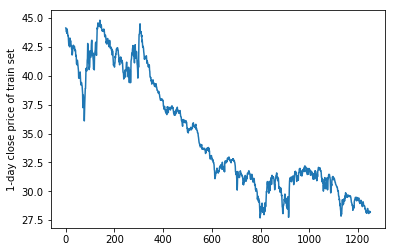

In [65]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

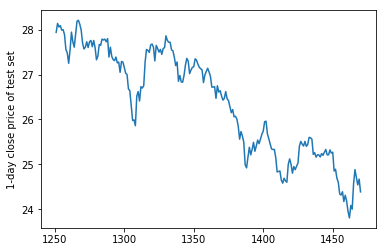

In [66]:
test.plot()
plt.ylabel('1-day close price of test set')

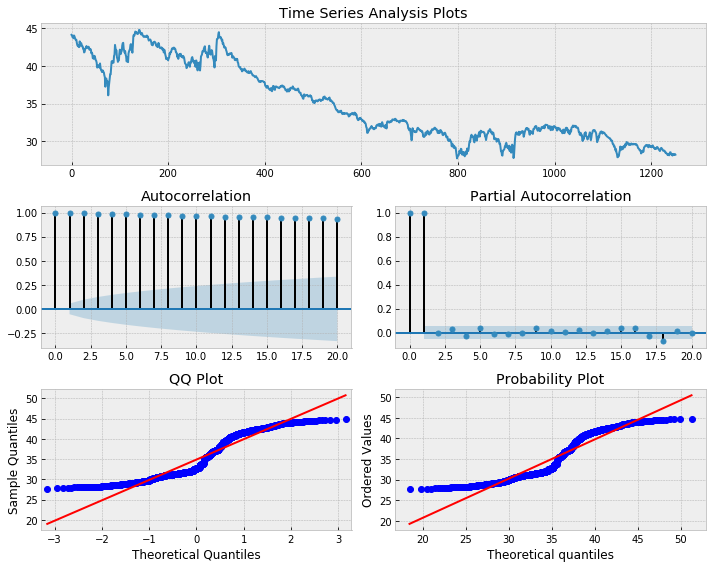

In [67]:
tsplot(train, lags=20)

In [68]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.4089845112321346,
 0.5779613320436677,
 0,
 1250,
 {'1%': -3.435592223709696, '5%': -2.8638549702604803, '10%': -2.56800251776},
 397.8202981127665)

Text(0,0.5,'Difference in 1-day close price')

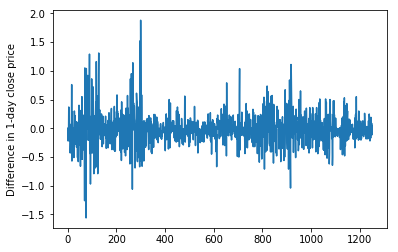

In [69]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [70]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-35.30625066078577,
 0.0,
 0,
 1249,
 {'1%': -3.4355964295197743,
  '5%': -2.863856825923603,
  '10%': -2.5680035060041626},
 399.6496528377638)

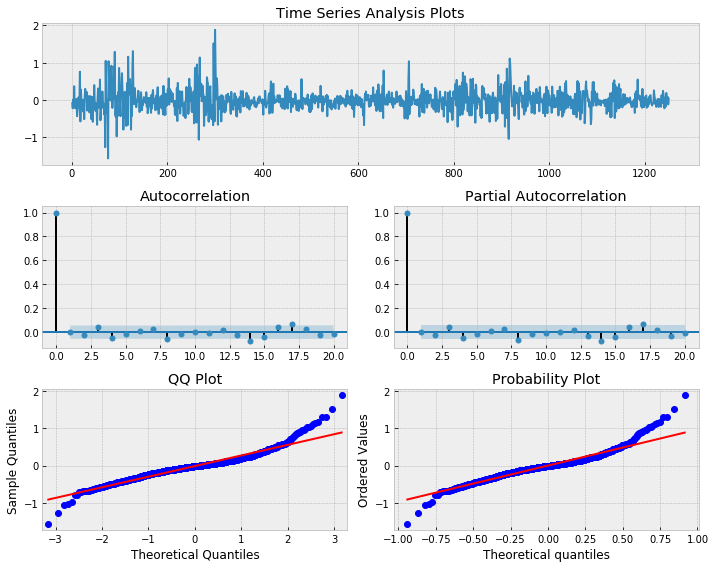

In [71]:
tsplot(train_diff, lags=20)

### Fit Model

In [72]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1250
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -200.914
Method:                           css   S.D. of innovations              0.284
Date:                Wed, 17 Apr 2019   AIC                            405.827
Time:                        14:14:58   BIC                            416.089
Sample:                             1   HQIC                           409.685
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0128      0.008     -1.588      0.112      -0.029       0.003
==============================================================================
"""

In [73]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1250
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.914
Method:                       css-mle   S.D. of innovations              0.284
Date:                Wed, 17 Apr 2019   AIC                            407.827
Time:                        14:15:01   BIC                            423.220
Sample:                             1   HQIC                           413.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0128      0.008     -1.588      0.113      -0.029       0.003
ar.L1.D.close     0.0002      0.028      0.007      0.994      -0.055       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         5009.0824           +0.0000j         5009.0824            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

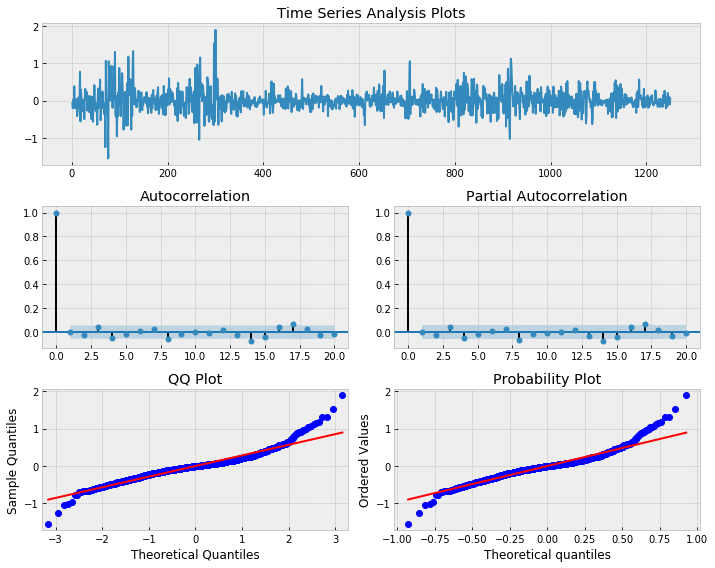

In [74]:
tsplot(arima010_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [75]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima010_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([6.46738418]), array([0.26335767]))

### Forecasting

In [76]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima010_fit.forecast(steps=num_steps)   #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [77]:
arima010_fit.forecast(steps=num_steps)   #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(array([28.1712352 , 28.1584704 , 28.1457056 , 28.13294079, 28.12017599]),
 array([0.28416291, 0.40186705, 0.4921846 , 0.56832583, 0.63540759]),
 array([[27.61428612, 28.72818428],
        [27.37082546, 28.94611534],
        [27.1810415 , 29.11036969],
        [27.01904264, 29.24683895],
        [26.8748    , 29.36555199]]))

In [78]:
arima010_fit.forecast(steps=num_steps)[0][4]    #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


28.120175992716693

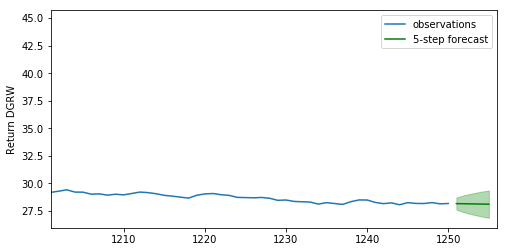

In [79]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return DGRW')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [10]:
pred = []
for i in range( int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15)  -5 + i]
    moving_arima010 = smt.ARIMA(moving_train, (1,1,0))   #change model parameters  & model name
    moving_arima010_fit = moving_arima010.fit()   #change model name*2
    
    pred.append(moving_arima010_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

220

In [81]:
len(test)

220

In [83]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9978327570530746
MAE = 0.31659939306405827
RMSE = 0.3995050056578328
Scaled MAE = 0.07187273395324817
Scaled RMSE = 0.09069353136386668


In [11]:
#(1,1,0)
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9978326137948172
MAE = 0.3166129779264031
RMSE = 0.39951820940253957
Scaled MAE = 0.07187581791745812
Scaled RMSE = 0.09069652880874902
